# Kütüphaneler

In [1]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers,activations

# Veriyi Yükleme

In [2]:
from tensorflow.keras.applications import VGG16

In [3]:
preprocess_input=tf.keras.applications.vgg16.preprocess_input

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir=r"C:Tensorflow\f1"

train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1,preprocessing_function=preprocess_input)

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1,preprocessing_function=preprocess_input)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(224,224),subset="training",batch_size=2,class_mode='sparse')

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(224,224),subset="validation",batch_size=2,class_mode='sparse')

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


# Hazır Model

In [5]:
vgg_model=VGG16()

In [6]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
print(type(vgg_model))

<class 'keras.engine.functional.Functional'>


In [8]:
model=Sequential()

for layer in vgg_model.layers[0:-1] :
    model.add(layer)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
#for layer in model.layers:
    #layer.trainable=False
#model.summary() 

In [10]:
model.add(layers.Dense(4))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [11]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer,loss=loss,metrics=["accuracy"])

In [12]:
result=model.fit(train_datagen,epochs=30,verbose=1,validation_data=test_datagen)

Epoch 1/30
126/126 [==============================] - 599s 5s/step - loss: 1.8441 - accuracy: 0.2778 - val_loss: 1.5200 - val_accuracy: 0.2500
Epoch 2/30
126/126 [==============================] - 486s 4s/step - loss: 1.4577 - accuracy: 0.2381 - val_loss: 2.3845 - val_accuracy: 0.2500
Epoch 3/30
126/126 [==============================] - 479s 4s/step - loss: 1.2693 - accuracy: 0.3849 - val_loss: 1.3260 - val_accuracy: 0.2857
Epoch 4/30
126/126 [==============================] - 477s 4s/step - loss: 1.3353 - accuracy: 0.3452 - val_loss: 1.4408 - val_accuracy: 0.2143
Epoch 5/30
126/126 [==============================] - 478s 4s/step - loss: 1.1468 - accuracy: 0.4841 - val_loss: 1.2769 - val_accuracy: 0.4643
Epoch 6/30
126/126 [==============================] - 468s 4s/step - loss: 0.6614 - accuracy: 0.7857 - val_loss: 1.5663 - val_accuracy: 0.6071
Epoch 7/30
126/126 [==============================] - 473s 4s/step - loss: 0.4946 - accuracy: 0.8056 - val_loss: 0.8775 - val_accuracy: 0.7500

In [20]:
acc=result.history["accuracy"]
val_acc=result.history["val_accuracy"]
acc_loss=result.history["loss"]
val_loss=result.history["val_loss"]
epoch=range(1,len(acc)+1)

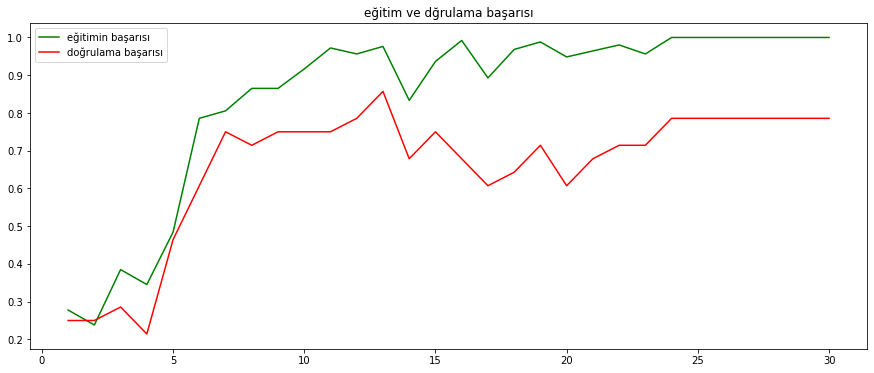

In [14]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc,label=("eğitimin başarısı"),color="g")
plt.plot(epoch,val_acc,label=("doğrulama başarısı"),color="r")
plt.title("eğitim ve dğrulama başarısı")
plt.legend()

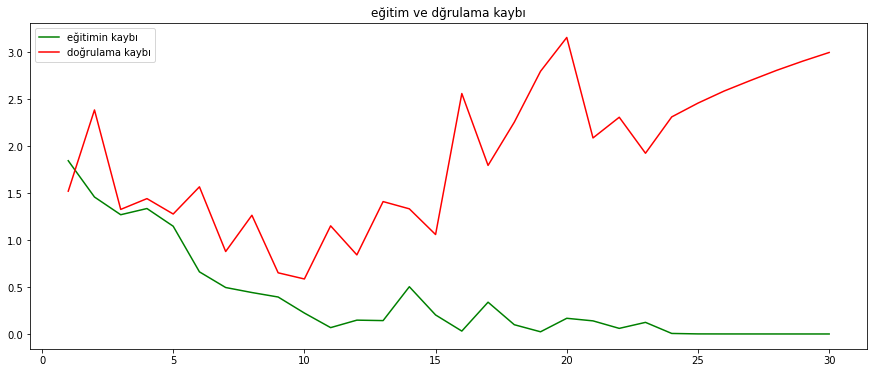

In [15]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc_loss,label=("eğitimin kaybı"),color="g")
plt.plot(epoch,val_loss,label=("doğrulama kaybı"),color="r")
plt.title("eğitim ve dğrulama kaybı")
plt.legend()

In [21]:
from PIL import Image
from skimage import transform

In [22]:
image=Image.open(r"McLaren03981.jpg")

def tek_resim(path):
    image=Image.open(path)
    image=np.array(image).astype("float32")/255
    image=transform.resize(image,(224,224,3))
    image=np.expand_dims(image,axis=0)
    print(test_datagen.class_indices)
    return image

image=tek_resim("McLaren03981.jpg")
pred=model.predict(image)
print(pred)
np.argmax(pred)

{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}
[[-4.51261    7.044959  -1.6300899  5.991004 ]]


1

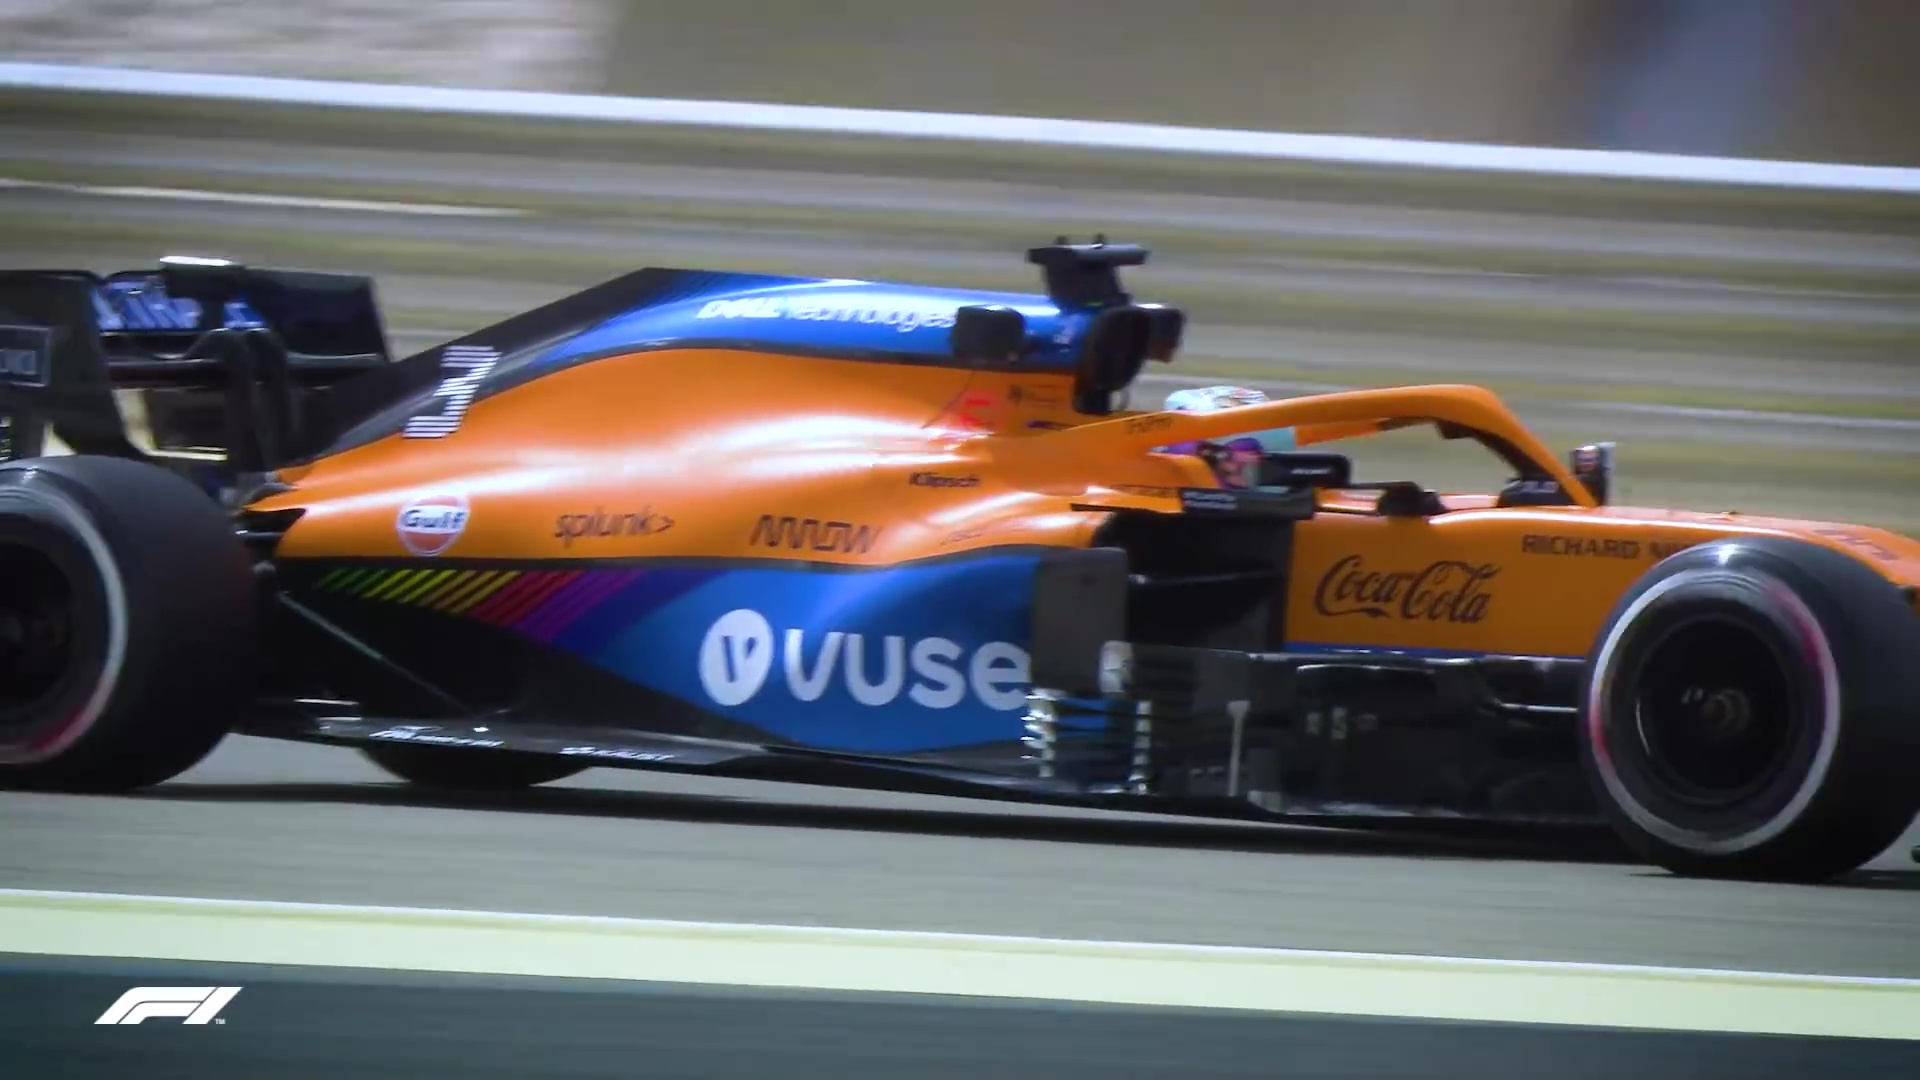

In [23]:
image=Image.open(r"McLaren03981.jpg")
image